## Chapter 2: testing some theory

Notes:

In [1]:
set.seed(123)
library(mlr)
library(ggplot2)
library(ElemStatLearn)

Loading required package: ParamHelpers
Warning message:
“package ‘ParamHelpers’ was built under R version 3.5.2”

In [2]:
me = ElemStatLearn::mixture.example
df = data.frame(x1 = me$x[,1], x2 = me$x[,2], y = me$y)

In [3]:
head(df)

x1,x2,y
2.52609297,0.3210504,0
0.36695447,0.0314621,0
0.76821908,0.7174862,0
0.69343568,0.7771940,0
-0.01983662,0.8672537,0
2.19654493,-1.0230141,0


Calculation of distances (only for 2 variables).

In [4]:
dist_ar = matrix(0, nrow(df), nrow(df))
for (j in 1:nrow(df)) {
    for (i in 1:nrow(df)) {
#         dist_ar[i,j] = dist(df[c(j,i), c(1,2)])
        dist_ar[i, j] = sqrt((df[j, 1] - df[i, 1])^2 + (df[j, 2] - df[i, 2])^2)
    }
} 
dist_ar[1:10, ]

0.0000000,2.1784720,1.80202161,1.88857081,2.6038616,1.3838755,2.7694581,3.553318,0.7397942,0.9060299,⋯,4.123235,3.7279493,3.315184,5.323618,2.0724134,3.006807,0.6208379,1.3960620,3.167206,2.7320677
2.1784720,0.0000000,0.79475927,0.81406763,0.9209533,2.1117105,0.7366286,1.743833,2.1797885,1.7975335,⋯,2.764574,1.7235723,2.661999,3.503397,0.3829166,2.264825,1.5639350,1.3406030,2.239732,0.7665078
1.8020216,0.7947593,0.00000000,0.09569528,0.8021609,2.2515452,1.5256357,1.753269,2.0708646,1.1581976,⋯,2.471678,1.9398290,2.049835,3.535733,0.4428792,1.657030,1.2820788,0.6002721,1.703726,0.9786608
1.8885708,0.8140676,0.09569528,0.00000000,0.7189354,2.3452263,1.5344507,1.664979,2.1661623,1.2202094,⋯,2.376361,1.8630378,1.972672,3.444370,0.4426445,1.578035,1.3754617,0.6453729,1.617428,0.9178864
2.6038616,0.9209533,0.80216089,0.71893541,0.0000000,2.9129812,1.4007257,0.958560,2.8286702,1.9205010,⋯,1.849561,1.1507032,1.835185,2.751784,0.6635988,1.452920,2.0678855,1.3276700,1.375295,0.3617758
1.3838755,2.1117105,2.25154520,2.34522634,2.9129812,0.0000000,2.3576943,3.831587,0.6765318,2.0190076,⋯,4.714360,3.8339878,4.211911,5.610995,2.2512810,3.842234,1.2186653,2.2048588,3.930801,2.8643046
2.7694581,0.7366286,1.52563569,1.53445067,1.4007257,2.3576943,0.0000000,1.922756,2.6114194,2.5081206,⋯,3.090366,1.7114443,3.234516,3.506631,1.0919015,2.847831,2.1499932,2.0760989,2.775364,1.0855236
3.5533181,1.7438330,1.75326895,1.66497918,0.9585600,3.8315871,1.9227560,0.000000,3.7837116,2.8207689,⋯,1.210632,0.4779884,1.848752,1.795665,1.5908970,1.590029,3.0262215,2.2258626,1.378606,0.9773267
0.7397942,2.1797885,2.07086461,2.16616234,2.8286702,0.6765318,2.6114194,3.783712,0.0000000,1.5166812,⋯,4.524219,3.8701769,3.862206,5.579252,2.2036758,3.519342,0.8188524,1.8505175,3.645149,2.8651663
0.9060299,1.7975335,1.15819761,1.22020937,1.9205010,2.0190076,2.5081206,2.820769,1.5166812,0.0000000,⋯,3.258928,3.0711795,2.409204,4.539566,1.5508067,2.105884,0.8091691,0.5960535,2.275878,2.1361251


Selection of the hyperparameter `k`. And calculating $\hat{Y}(x) = \frac{1}{k} \sum_{x_i \in N_k} y_i$. `x_i` are those values in the neighbourhood.

Sorting distances for each observation, taking positions `which()` of the nearest `k`, and then using position for averaging $y_i$.

In [13]:
kk = 15
ypred = rnorm(nrow(df)) * 0
for (j in 1:nrow(df)) {
#     ypred[j] = mean(df[which(dist_ar[j, ] %in% sort(dist_ar[j, ])[2:(kk+1)]), 3]) 
    ypred[j] = mean(df[which(dist_ar[j, ] %in% sort(dist_ar[j, ])[1:kk]), 3]) 
}

In [14]:
t(which(dist_ar[1, ] %in% sort(dist_ar[1, ])[1:kk]))

1,31,44,51,59,67,80,97,98,142,154,157,164,174,197


In [15]:
# plot(df[, 1], df[, 2])

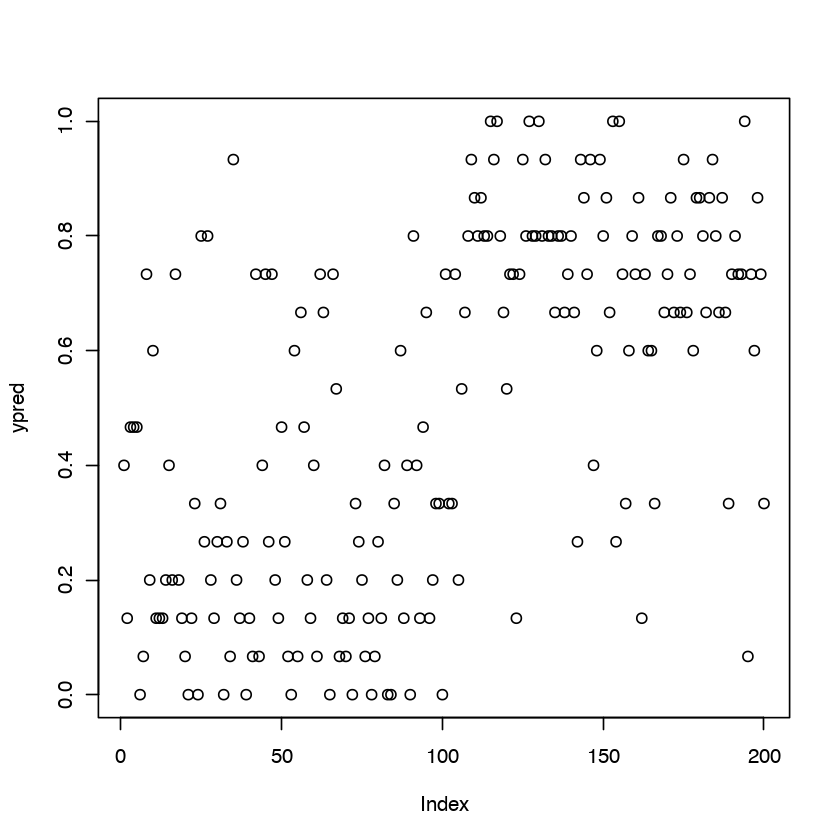

In [16]:
plot(ypred)

Creating new two `data.frames` each corresponding to 0 or 1 class.

In [17]:
df0 = df[c(which(ypred <= 0.5)), ]
df1 = df[c(which(ypred > 0.5)), ] # trouble with 0.5 values
df2 = df[c(which(df[, 3] <= 0.5)), ]
df3 = df[c(which(df[, 3] > 0.5)), ] # trouble with 0.5 values

In [18]:
data.frame((ypred > 0.5), df[, 3])[1:10,] # check of predicted vs true

X.ypred...0.5.,df...3.
FALSE,0
FALSE,0
FALSE,0
FALSE,0
FALSE,0
FALSE,0
FALSE,0
TRUE,0
FALSE,0
TRUE,0


In [19]:
paste("Error: ", sum((ypred > 0.5) != df[, 3])/nrow(df)*100, "%")

[1] "Error:  15.5 %"

Plot of classified region is labelled with circles. Because I did not draw the border line between the two classes.

When true observation is missclassified it there appears a triangle on top of the circle.

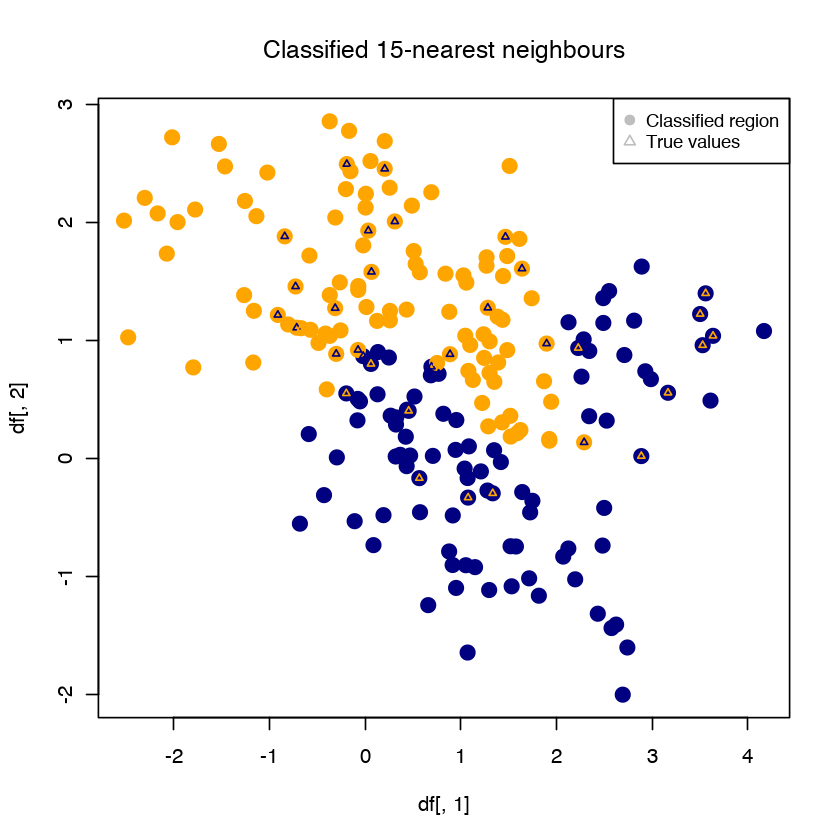

In [20]:
plot(df[, 1], df[, 2], main=paste("Classified ", kk, "-nearest neighbours", sep=""), col="white")
# predicted
points(df0[, 1], df0[, 2], col="navy", cex=1.5, pch=19)
points(df1[, 1], df1[, 2], col="orange", cex=1.5, pch=19)
# true
points(df2[, 1], df2[, 2], col="navy", cex=0.6, pch=2)
points(df3[, 1], df3[, 2], col="orange", cex=0.6, pch=2)
legend("topright", legend=c("Classified region", "True values"), col=c("grey", "grey"), pch=c(19,2), cex=0.9)

Comparison

![hastie](hastie-15-nearest.png)


### OLS Classification comparison

In [21]:
X = as.matrix(cbind(1, df[,1:2]))
y = as.matrix(df[,3])
b1 = solve(t(X) %*% X) %*% (t(X) %*% y)
b1

1,0.3290614
x1,-0.0226360
x2,0.2495983


In [22]:
y_ols = X %*% b1
df4 = df[c(which(y_ols < 0.5)), ]
df5 = df[c(which(y_ols >= 0.5)), ] # trouble with 0.5 values

In [23]:
b2 = coef(lm(y ~ X[, 2] + X[, 3]))

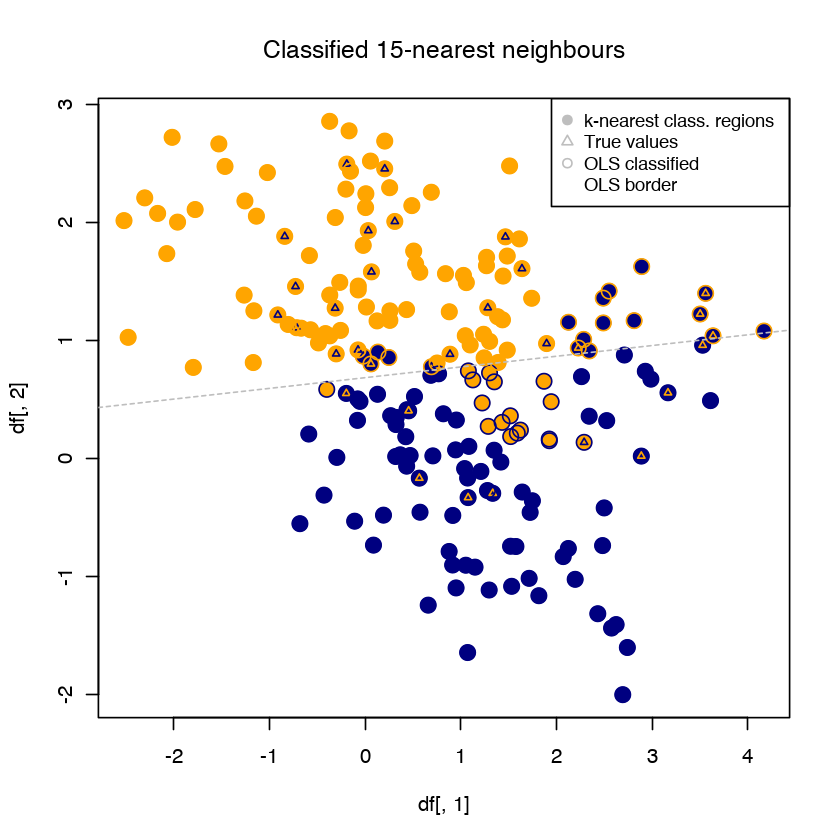

In [35]:
plot(df[, 1], df[, 2], main=paste("Classified ", kk, "-nearest neighbours", sep=""), col="white")
# predicted
points(df0[, 1], df0[, 2], col="navy", cex=1.5, pch=19)
points(df1[, 1], df1[, 2], col="orange", cex=1.5, pch=19)
# true
points(df2[, 1], df2[, 2], col="navy", cex=0.6, pch=2)
points(df3[, 1], df3[, 2], col="orange", cex=0.6, pch=2)
# ols
points(df4[, 1], df4[, 2], col="navy", cex=1.6)
points(df5[, 1], df5[, 2], col="orange", cex=1.6)
# abline(1.28, -0.2, col="grey") # just guess how it could look like
# abline(b1[1], sum(b1[2:3]), col="grey")
abline((0.5-b1[1])/b1[3], -b1[2]/b1[3], col="grey", lty=2)
legend("topright", legend=c("k-nearest class. regions", "True values", "OLS classified", "OLS border"),
       col=c("grey"), pch=c(19, 2, 1, NA), cex=0.9)

In [25]:
lm(y ~ X[, 2] + X[, 3])


Call:
lm(formula = y ~ X[, 2] + X[, 3])

Coefficients:
(Intercept)       X[, 2]       X[, 3]  
    0.32906     -0.02264      0.24960  
